In [1]:
reading = '/Users/jasmine/Downloads/MachineReadingOutput.csv'
baseline = '/Users/jasmine/Downloads/BooleanTcell.xlsx'
out_dir = '/Users/jasmine/Desktop/o/'
return_path_TH = 5
FC_TH = 2 

In [2]:
import pandas as pd
import re
import numpy as np
import networkx as nx
import math
import pickle
import community
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
import os
import time
import matplotlib.pyplot as plt

In [3]:
from runClarinet import create_eclg

In [4]:
from runClarinet import get_model

In [5]:
from runClarinet import getVariableName

In [6]:
model_dict, regulators = get_model(baseline)
weightMethod = 'FC'
G = create_eclg(reading, model_dict) 

['AKT', 'be_AKT', 'be', 'P31749', '', 'family', '', '', 'CD4', 'uniprot_P01730', 'uniprot', 'P01730', '', 'protein', '', '', 'decreases', '', '', '', '', '', '', '', '', 'PMC2275380', '', '']
['AKT', 'be_AKT', 'be', 'P31749', '', 'family', '', '', 'CTRL', 'uniprot_P40313', 'uniprot', 'P40313', '', 'protein', '', '', 'decreases', '', '', '', '', '', '', '', '', 'PMC2275380', '', '']
['TGFBETA', 'interpro_P01137', 'interpro', 'P01137', '', 'family', '', '', 'AKT', 'be_AKT', 'be', 'P31749', '', 'family', '', '', 'increases', '', '', '', '', '', '', '', '', 'PMC2275380', '', '']
['Foxp3', 'uniprot_Q9BZS1', 'uniprot', 'Q9BZS1', '', 'protein', '', '', 'Ctla4', 'uniprot_P16410', 'uniprot', 'P16410', '', 'protein', '', '', 'increases', '', '', '', '', '', '', '', '', 'PMC2275380', '', '']
['Foxp3', 'uniprot_Q9BZS1', 'uniprot', 'Q9BZS1', '', 'protein', '', '', 'Gpr83', 'uniprot_Q9NYM4', 'uniprot', 'Q9NYM4', '', 'protein', '', '', 'increases', '', '', '', '', '', '', '', '', 'PMC2275380', '', ''

In [7]:
print(G.nodes())

['AKT->CD4_ext->-', 'AKT->CTRL_ext->-', 'TGFBETA->AKT->+', 'FOXP3->Ctla4_ext->+', 'FOXP3->Gpr83_ext->+', 'PTEN->CD8_ext->+', 'PTEN->HSC_ext->+', 'CHK1_ext->AKT->+', 'Foxo_ext->Foxo3a_ext->-', 'IQGAP1_ext->MEK2->-', 'MEK1_ext->AKT->-', 'AKT->MEK1_ext->-', 'AKT->MAGI1_ext->-', 'ERK->S5B_ext->+', 'MEK2->PTEN->+', 'TCR->CD4_ext->-', 'Itk_ext->CD4_ext->-', 'AKT->Itk_ext->-', 'FOXP3->Itk_ext->+', 'Itk_ext->CD4_ext->+', 'IL2->Itk_ext->+', 'TCR->Itk_ext->+', 'TCR->PTEN->-', 'PTEN->Itk_ext->-', 'Itk_ext->Th17_ext->+', 'CD4_ext->IL17A_ext->-', 'HIF1alpha_ext->IL17A_ext->-', 'TCR->CD25->+', 'Itk_ext->Myc_ext->-', 'AKT->TBK1_ext->+', 'MTOR->TBK1_ext->+', 'TCR->AKT->-', 'TBK1_ext->AKT->-', 'AKT->Foxo1_ext->-', 'TBK1_ext->CD4_ext->-', 'TBK1_ext->Foxo1_ext->+', 'TBK1_ext->AKT->+', 'TBK1_ext->CD4_ext->+', 'TCR->NEDD4_ext->+', 'Foxo1_ext->PTEN->+', 'MEK1_ext->PTEN->+', 'CK2_ext->PTEN->-', 'NEDD4_ext->PTEN->-', 'PIP3->AKT->+', 'MTORC2->AKT->+', 'TCR->MTORC2->+', 'AKT->MTORC2->-', 'TCR->PIP3->+', 'PTEN->

In [8]:
from runClarinet import node_weighting
from runClarinet import edge_weighting
from runClarinet import clustering
from runClarinet import merge_clusters

In [9]:
os.mkdir(out_dir)

In [10]:
G = node_weighting(G, FC_TH, out_dir)

Frequency of most frequent node before: 31
Total number of nodes before removing less frequent nodes:
95
Total number of edges before removing less frequent nodes:
512
hist before removing less frequent nodes
[0, 0, 3, 5, 9, 6, 0, 5, 18, 2, 0, 0, 0, 0, 28, 0, 0, 15, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
node length after removing less frequent nodes
72
edge length after removing less frequent nodes
465
Frequency of most frequent node after: 31
hist after removing less frequent nodes
[0, 0, 0, 0, 0, 0, 0, 5, 20, 0, 0, 0, 0, 0, 29, 0, 0, 15, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]


In [11]:
data = [[0, 0, 3, 5, 9, 6, 0, 5, 18, 2, 0, 0, 0, 0, 28, 0, 0, 15, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 5, 20, 0, 0, 0, 0, 0, 29, 0, 0, 15, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]]

In [12]:
print(len(data[1]))

32


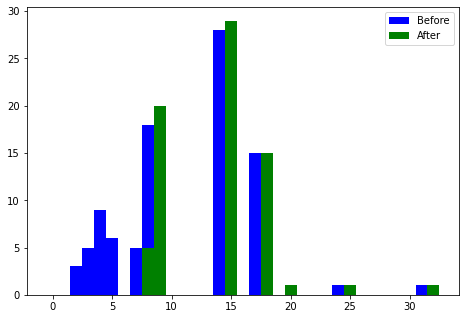

In [13]:
X = np.arange(32)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X  , data[0], color = 'b', width = 1)
ax.bar(X +1, data[1], color = 'g', width = 1)
ax.legend(labels=['Before', 'After'])
plt.show()

In [14]:
weightMethod = 'FC'
G = edge_weighting(G, out_dir, weightMethod)

In [15]:
clustering(G, out_dir) 

Community of  CK2_ext->CDC37_ext->+->2 (ID  0 ) -  9  Interactions:
['CK2_ext->CD4_ext->+->2', 'SP_ext->CD69_ext->+->2', 'CK2_ext->CDC37_ext->+->2', 'CK2_ext->AKT->+->2', 'ERK->CK2_ext->+->2', 'Bcl2_ext->CD3_ext->+->2', 'CD5_ext->CK2_ext->+->2', 'CD5_ext->P38_ext->+->2', 'P38_ext->CD5_ext->+->2'] 

Community of  AKT->MTORC2->-->1 (ID  1 ) -  18  Interactions:
['TCR->NEDD4_ext->+->1', 'Foxo1_ext->PTEN->+->1', 'MEK1_ext->PTEN->+->1', 'CK2_ext->PTEN->-->1', 'NEDD4_ext->PTEN->-->0', 'PIP3->AKT->+->1', 'MTORC2->AKT->+->1', 'TCR->MTORC2->+->1', 'AKT->MTORC2->-->1', 'TCR->PIP3->+->1', 'PTEN->PIP3->-->1', 'TCR->MEK1_ext->+->1', 'TCR->CK2_ext->+->1', 'MTORC2->MTORC2->+->1', 'CD28->MTORC2->+->1', 'IL2->MTORC2->+->1', 'CD25->MTORC2->+->1', 'PI3K->PIP3->+->0'] 

Community of  MTOR->Pak1_ext->-->1 (ID  2 ) -  14  Interactions:
['FOXO3_ext->FOXO3_ext->+->1', 'PI3K->AKT->-->1', 'FASL_ext->FAS_ext->+->1', 'Bcl2l11_ext->CD4_ext->+->1', 'SHIP_ext->PI3K->+->1', 'SHIP1_ext->AKT->-->1', 'BAM32_ext->PAK1_ex

In [16]:
merge_clusters(regulators, out_dir, 1)

merge:
0 and 1
merge:
1 and 5
merge:
3 and 5


In [17]:
print(regulators)

{'AKT': {'PDK1', 'AKT_OFF', 'MTORC2'}, 'AKT_OFF': set(), 'AP1': {'FOS_DD', 'JUN'}, 'CA': {'TCR'}, 'CD122': set(), 'CD132': set(), 'CD25': {'NFAT', 'NFKAPPAB', 'FOXP3', 'AP1', 'STAT5'}, 'CD28': set(), 'ERK': {'MEK2'}, 'FOS': {'ERK'}, 'FOS_D': {'FOS'}, 'FOS_DD': {'FOS_D'}, 'FOS_DDD': set(), 'FOXP3': {'NFAT', 'STAT5', 'SMAD3', 'MTOR_DD'}, 'IL2': {'NFAT', 'NFKAPPAB', 'FOXP3', 'IL2', 'AP1'}, 'IL2_EX': {'IL2', 'IL2_EX'}, 'IL2R': {'CD132', 'CD25', 'CD122'}, 'JAK3': {'IL2R', 'IL2_EX'}, 'JNK': {'MKK7'}, 'JUN': {'JNK'}, 'MEK2': {'RAF'}, 'MKK7': {'TAK1'}, 'MTOR': {'MTORC1_D', 'MTORC2_D'}, 'MTOR_D': {'MTOR'}, 'MTOR_DD': {'MTOR_D'}, 'MTOR_DDD': set(), 'MTOR_DDDD': set(), 'MTORC1': {'MTORC1_OFF', 'RHEB'}, 'MTORC1_D': {'MTORC1'}, 'MTORC1_OFF': set(), 'MTORC2': {'PI3K_HIGH', 'PI3K_LOW', 'S6K1'}, 'MTORC2_D': {'MTORC2'}, 'MTORC2_DD': set(), 'NFAT': {'NFAT_OFF', 'CA'}, 'NFAT_OFF': set(), 'NFKAPPAB': {'PKCTHETA', 'AKT'}, 'PDK1': {'PIP3'}, 'PI3K': {'PI3K_HIGH', 'PI3K_LOW'}, 'PI3K_HIGH': {'IL2_EX', 'IL2R', 

In [18]:
pickle.load(open(out_dir + "grouped_ext",'rb'))

[[1,
  ['CK2_ext->CD4_ext->+->2', 'SP_ext->CD69_ext->+->2', 3],
  ['CK2_ext->CD4_ext->+->2', 'CK2_ext->CDC37_ext->+->2', 2],
  ['CK2_ext->CD4_ext->+->2', 'CK2_ext->AKT->+->2', 3],
  ['CK2_ext->CD4_ext->+->2', 'ERK->CK2_ext->+->2', 3],
  ['CK2_ext->CD4_ext->+->2', 'Bcl2_ext->CD3_ext->+->2', 2],
  ['CK2_ext->CD4_ext->+->2', 'CD5_ext->CK2_ext->+->2', 3],
  ['CK2_ext->CD4_ext->+->2', 'CD5_ext->P38_ext->+->2', 3],
  ['CK2_ext->CD4_ext->+->2', 'P38_ext->CD5_ext->+->2', 3],
  ['SP_ext->CD69_ext->+->2', 'CK2_ext->CDC37_ext->+->2', 2],
  ['SP_ext->CD69_ext->+->2', 'CK2_ext->AKT->+->2', 3],
  ['SP_ext->CD69_ext->+->2', 'ERK->CK2_ext->+->2', 3],
  ['SP_ext->CD69_ext->+->2', 'Bcl2_ext->CD3_ext->+->2', 2],
  ['SP_ext->CD69_ext->+->2', 'CD5_ext->CK2_ext->+->2', 3],
  ['SP_ext->CD69_ext->+->2', 'CD5_ext->P38_ext->+->2', 3],
  ['SP_ext->CD69_ext->+->2', 'P38_ext->CD5_ext->+->2', 3],
  ['CK2_ext->CDC37_ext->+->2', 'CK2_ext->AKT->+->2', 2],
  ['CK2_ext->CDC37_ext->+->2', 'ERK->CK2_ext->+->2', 2],
  ['CK